In [4]:
import numpy as np
import cv2
%matplotlib inline

from skimage import color
from skimage import io

from scipy import ndimage

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image


In [5]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

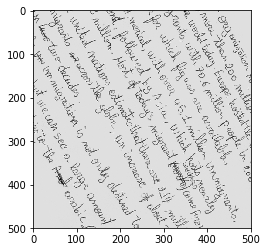

In [6]:
#Test importing and cropping image to center 

image = color.rgb2gray(mpimg.imread('data_prepared/1.png'))
plt.imshow(image, cmap='gray') # show image in grayscale

image = crop_center(image, 500, 500)
plt.imshow(image, cmap='gray') # show image in grayscale


In [7]:
def import_image_and_crop(datapath,crop_size=1000):
    ''' Read the image, convert it to grayscale, and use only the (crop_size x crop_size) center
    If the crop_size is larger than the image_size, use padding'''
    image = color.rgb2gray(mpimg.imread(datapath))
    if(np.shape(image)[0]<crop_size or np.shape(image)[1]<crop_size):
        # If the crop size is too large for the image, copy the border to enlarge the image again
        dif_height = int(np.ceil( (crop_size - np.shape(image)[0]) /2))
        dif_width = int(np.ceil( (crop_size - np.shape(image)[1]) /2))
        if(dif_height<0):
            dif_height = 0
        if(dif_width<0):
            dif_width = 0
        image = cv2.copyMakeBorder(image,dif_height,dif_height,dif_width,dif_width,cv2.BORDER_REPLICATE)
    image = crop_center(image, crop_size, crop_size)
    return image

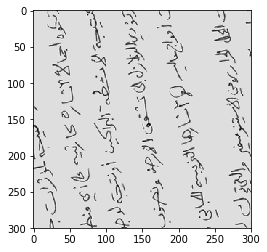

In [8]:
plt.imshow(import_image_and_crop('data_prepared/911.png', 300), cmap='gray')
# example of an image that is too big for the cropsize and therefore "regenerated"

In [29]:
# import data

from os import listdir
from os.path import isfile, join
import random

crop_size = 250

# Here, you can choose the folder data_prepared for all data, data_prepared_X for the language X only

onlyfiles = [f for f in listdir('data_prepared_english/') if isfile(join('data_prepared_english/', f))] # get list of datanames in folder
#onlyfiles = [f for f in listdir('data_prepared_arabic/') if isfile(join('data_prepared_arabic/', f))] # get list of datanames in folder
#onlyfiles = [f for f in listdir('data_prepared/') if isfile(join('data_prepared/', f))] # get list of datanames in folder

number_data = len(onlyfiles) - 1 # How many datafiles? One less because there is a list for the rotations
datanames = np.linspace(0,number_data-1,number_data, dtype=np.int32)

X_train_pre = np.empty([number_data,crop_size,crop_size]) # create array to be filled, remember crop_size

for counter in datanames:
    print(counter, end="\r")
    datapath = 'data_prepared_english/' + str(int(counter))+'.png' # i know this is ugly
    #datapath = 'data_prepared_arabic/' + str(int(number_of_file))+'.png' # i know this is ugly
    #datapath = 'data_prepared/' + str(int(number_of_file))+'.png' # i know this is ugly
    X_train_pre[counter,:,:] = import_image_and_crop(datapath, crop_size)
    

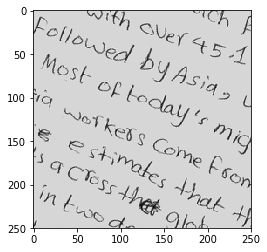

In [30]:
plt.imshow(X_train_pre[5,:,:], cmap='gray') # show image in grayscale, now squared and in the middle


In [31]:
# load angle list
Y_train_pre2 = np.loadtxt('data_prepared_english/angle_list.txt', delimiter=',', unpack=True)
#Y_train_pre2 = np.loadtxt('data_prepared_arabic/angle_list.txt', delimiter=',', unpack=True)
#Y_train_pre2 = np.loadtxt('data_prepared/angle_list.txt', delimiter=',', unpack=True)

Y_train_pre2.reshape((number_data,1))


array([[133.],
       [247.],
       [ 84.],
       [ 78.],
       [ 21.],
       [338.],
       [229.],
       [271.],
       [103.],
       [232.],
       [187.],
       [ 50.],
       [166.],
       [135.],
       [284.],
       [232.],
       [112.],
       [ 77.],
       [ 75.],
       [282.],
       [ 68.],
       [337.],
       [173.],
       [197.],
       [161.],
       [142.],
       [325.],
       [221.],
       [ 88.],
       [ 99.],
       [153.],
       [101.],
       [ 45.],
       [288.],
       [ 69.],
       [ 22.],
       [274.],
       [100.],
       [266.],
       [ 77.],
       [280.],
       [358.],
       [120.],
       [194.],
       [276.],
       [111.],
       [ 47.],
       [ 71.],
       [319.],
       [ 98.],
       [135.],
       [205.],
       [141.],
       [ 49.],
       [ 13.],
       [356.],
       [100.],
       [179.],
       [226.],
       [312.],
       [137.],
       [ 68.],
       [ 68.],
       [ 71.],
       [353.],
       [232.],
       [10

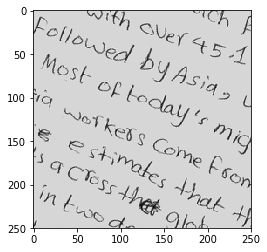

In [35]:
X_train_pre = X_train_pre.astype('float32')
from scipy import ndimage

plt.imshow(X_train_pre[5,:,:],cmap = 'gray')


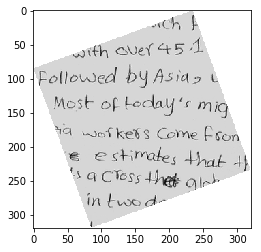

In [36]:
image = ndimage.rotate(X_train_pre[5,:,:], 20, cval=1) # rotate image
plt.imshow(image,cmap = 'gray')

In [261]:
# muss man den path geben und lädt dann immer wieder.... => doof; unten besser

def import_image_and_crop_and_rotate_conv(datapath,rotation,crop_size=1000):
    ''' Read the image, convert it to grayscale, and use only the (crop_size x crop_size) center
    If the crop_size is larger than the image_size, use padding'''
    image2 = color.rgb2gray(mpimg.imread(datapath))
    #image = color.rgb2gray(mpimg.imread(datapath))
    #plt.imshow(image,cmap='gray')
    image2 = ndimage.rotate(image2, rotation, cval=1) # rotate image
    #plt.imshow(image,cmap='gray')
    if(np.shape(image2)[0]<crop_size or np.shape(image2)[1]<crop_size):
        # If the crop size is too large for the image, copy the border to enlarge the image again
        dif_height = int(np.ceil( (crop_size - np.shape(image2)[0]) /2))
        dif_width = int(np.ceil( (crop_size - np.shape(image2)[1]) /2))
        if(dif_height<0):
            dif_height = 0
        if(dif_width<0):
            dif_width = 0
        image2 = cv2.copyMakeBorder(image2,dif_height,dif_height,dif_width,dif_width,cv2.BORDER_REPLICATE)
    image2 = crop_center(image2, crop_size, crop_size)
    kernel = np.ones((crop_size,crop_size),np.float32)/crop_size**2
    image2 = cv2.filter2D(image2,-1,kernel)
    return image2

In [260]:
# versuch ihm das Bild zu geben und nicht den path, klappt
def crop_and_rotate_conv(image2,rotation,crop_size=1000):
    ''' Read the image, convert it to grayscale, and use only the (crop_size x crop_size) center
    If the crop_size is larger than the image_size, use padding'''
    #image = color.rgb2gray(mpimg.imread(datapath))
    image2 = ndimage.rotate(image2, rotation, cval=1) # rotate image
    #plt.imshow(image,cmap='gray')
    if(np.shape(image2)[0]<crop_size or np.shape(image2)[1]<crop_size):
        # If the crop size is too large for the image, copy the border to enlarge the image again
        dif_height = int(np.ceil( (crop_size - np.shape(image2)[0]) /2))
        dif_width = int(np.ceil( (crop_size - np.shape(image2)[1]) /2))
        if(dif_height<0):
            dif_height = 0
        if(dif_width<0):
            dif_width = 0
        image2 = cv2.copyMakeBorder(image2,dif_height,dif_height,dif_width,dif_width,cv2.BORDER_REPLICATE)
    image2 = crop_center(image2, crop_size, crop_size)
    kernel = np.ones((crop_size,crop_size),np.float32)/crop_size**2
    image2 = cv2.filter2D(image2,-1,kernel)
    return image2

In [263]:
# soll mir einfach ein Bild drehen

def import_image_and_crop_and_rotate(datapath,rotation,crop_size=1000):
    ''' Read the image, convert it to grayscale, and use only the (crop_size x crop_size) center
    If the crop_size is larger than the image_size, use padding'''
    image = color.rgb2gray(mpimg.imread(datapath))
    #plt.imshow(image,cmap='gray')
    image = ndimage.rotate(image, rotation, cval=1) # rotate image
    #plt.imshow(image,cmap='gray')
    if(np.shape(image)[0]<crop_size or np.shape(image)[1]<crop_size):
        # If the crop size is too large for the image, copy the border to enlarge the image again
        dif_height = int(np.ceil( (crop_size - np.shape(image)[0]) /2))
        dif_width = int(np.ceil( (crop_size - np.shape(image)[1]) /2))
        if(dif_height<0):
            dif_height = 0
        if(dif_width<0):
            dif_width = 0
        image = cv2.copyMakeBorder(image,dif_height,dif_height,dif_width,dif_width,cv2.BORDER_REPLICATE)
    image = crop_center(image, crop_size, crop_size)
    return image

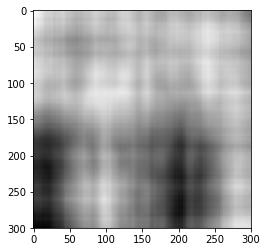

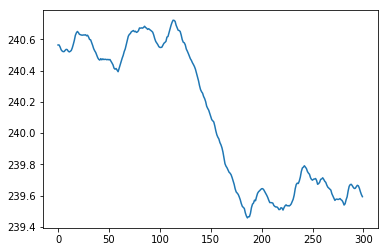

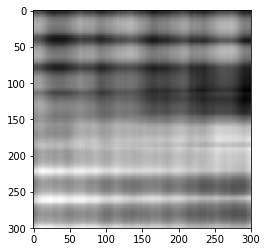

(300, 300)

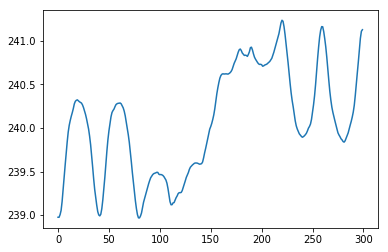

In [264]:
image1 = import_image_and_crop_and_rotate_conv('data_prepared_english/1.png',0, 300)
plt.imshow(image1[:,:], cmap='gray')
plt.show()
plt.clf()
plt.plot(np.sum(image1, axis=1))
plt.show()
plt.clf()
image2 = import_image_and_crop_and_rotate_conv('data_prepared_english/1.png',110, 300)
plt.imshow(image2[:,:], cmap='gray')
plt.show()
plt.clf()
#plt.imshow(image, cmap='gray')
#print(image)
plt.plot(np.sum(image2, axis=1))
image2.shape
#plt.show()

In [265]:
def derivative(array): #bildet die Ableitung, sprich es gibt Auskunft darüber wie stark gewisse Bereiche alternieren
    deri = np.zeros(len(array))
    for i in range(len(array)-1):
        tmp = abs(array[i] - array[i+1])
        deri[i] = tmp
    return deri

len(np.sum(image1, axis=1))

300

In [266]:
def zero_score(array): #zählt einfach nur wieviele stark (irgendein grenzwert) alternierende Bereiche es gibt
    score = 0
    for point in array:
        if(point>0.1): # dies ist dieser irgendein grenzwert
            score = score+1
    return score

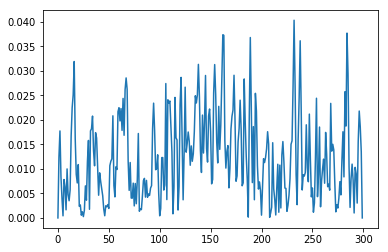

0


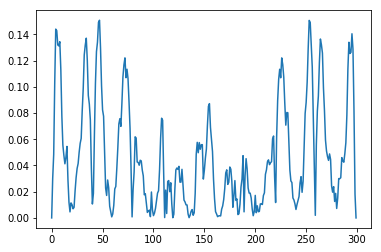

46


In [267]:
#kleiner test, um zu sehen was die einzelnen Funktionen tun

test = derivative(np.sum(image1, axis=1))
plt.plot(test)
plt.show()
plt.clf()
print(zero_score(test))
test = derivative(np.sum(image2, axis=1))
plt.plot(test)
plt.show()
print(zero_score(test))

In [268]:
# prediction über simple methode

def pred_simple(datapath):
    # wollte das Bild eig hier schon reinladen, aber dann gibt es diese komischen Farbprobleme.... -.-
    i = np.linspace(0,359,360)
    score_list = np.zeros(len(i))
    j = 0
    for item in i:
        image = import_image_and_crop_and_rotate_conv(datapath,item, 300) #ist noch doof, weil der das Bild immer wieder neu lädt, aber wenn ich das vorher für alle rotationen lade, dann bekomme ich diese komischen farbigen Bilder
        test = derivative(np.sum(image, axis=1))
        score_list[j] = zero_score(test)
        j = j+1
        print(np.round((j/360*100)),'%', end="\r")
    plt.plot(score_list) # hier kann man ganz gut sehen, dass es zwei maxima gibt: einmal richtig herum und einmal kopfüber
    plt.show()
    plt.clf()
    # Drehung finden, an dem der höchste score ist
    y_pred = i[np.argmax(score_list)]
    return y_pred
    

In [274]:


# prediction über simple methode ohne ständiges laden

def pred_simple_2(datapath):
    image2 = color.rgb2gray(mpimg.imread(datapath))
    plt.imshow(image2, cmap="gray")
    plt.show()
    plt.clf()
    i = np.linspace(0,359,360)
    score_list = np.zeros(len(i))
    j = 0
    for item in i:
        image = crop_and_rotate_conv(np.asmatrix(image2),item, 300) # np.asmatrix scheint das Problem das ich hatte zu lösen, aber np.asmatrix dauert glaube ich auch lange :/
        test = derivative(np.sum(image, axis=1))
        score_list[j] = zero_score(test)
        j = j+1
        print(np.round((j/360*100)),'%', end="\r")
    plt.plot(score_list) # hier kann man ganz gut sehen, dass es zwei maxima gibt: einmal richtig herum und einmal kopfüber
    plt.show()
    plt.clf()
    # Drehung finden, an dem der höchste score ist
    y_pred = i[np.argmax(score_list)]
    return y_pred


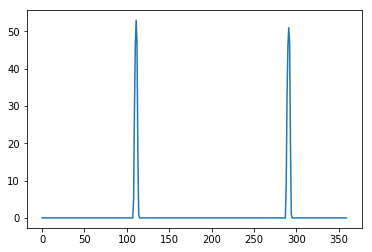

111.0

<Figure size 432x288 with 0 Axes>

In [272]:
pred_simple_2('data_prepared_english/1.png')

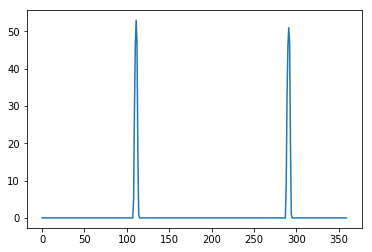

111.0

<Figure size 432x288 with 0 Axes>

In [240]:
#plt.imshow(color.rgb2gray(mpimg.imread('data_prepared_english/1.png')))
pred_simple('data_prepared_english/1.png')

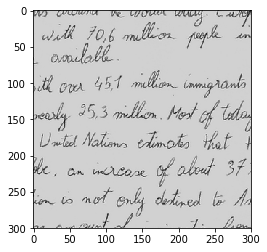

<Figure size 432x288 with 0 Axes>

In [244]:
image = import_image_and_crop_and_rotate('data_prepared_english/1.png',111, 300)
image.shape
plt.imshow(image[:,:], cmap='gray')
plt.show()
plt.clf()

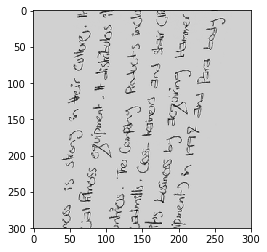

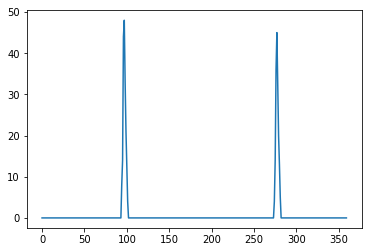

97.0

<Figure size 432x288 with 0 Axes>

In [245]:
plt.clf()
image = import_image_and_crop_and_rotate('data_prepared_english/2.png',0, 300)
plt.imshow(image[:,:], cmap='gray')
plt.show()
plt.clf()
pred_simple('data_prepared_english/2.png')

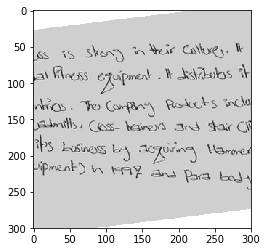

<Figure size 432x288 with 0 Axes>

In [247]:
image = import_image_and_crop_and_rotate('data_prepared_english/2.png',97+180, 300)
plt.imshow(image[:,:], cmap='gray')
plt.show()
plt.clf()

0


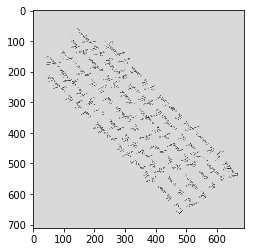

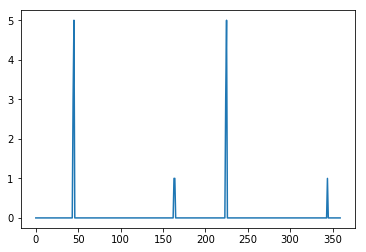

1


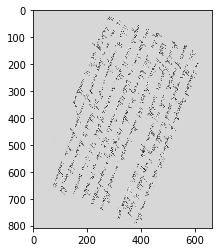

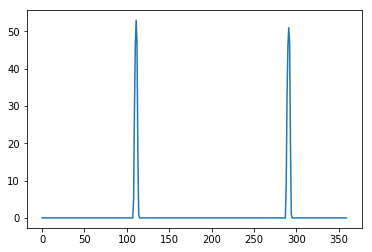

2


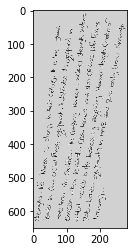

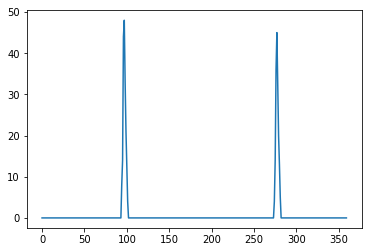

3


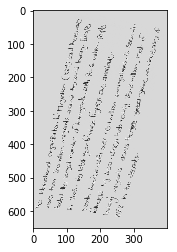

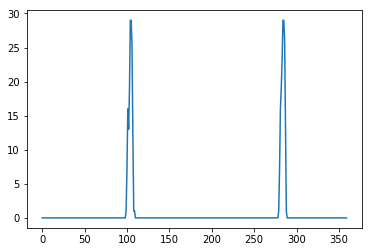

4


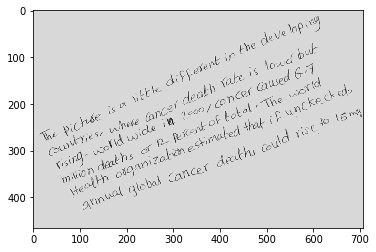

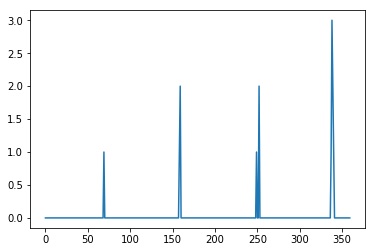

5


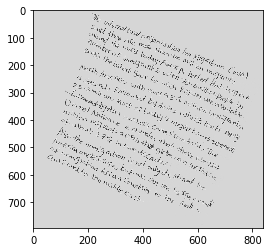

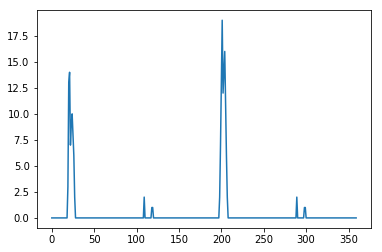

6


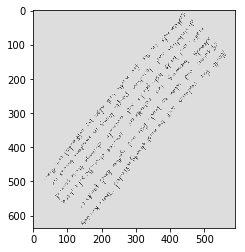

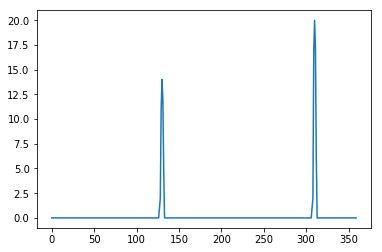

7


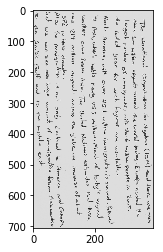

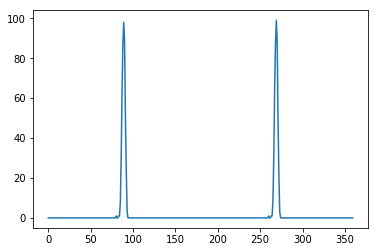

8


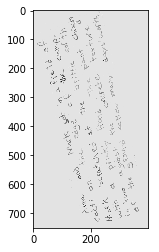

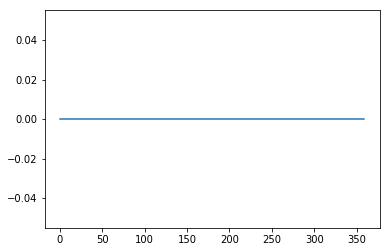

9


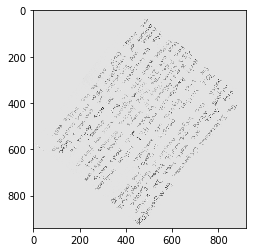

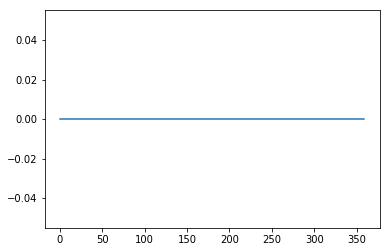

10


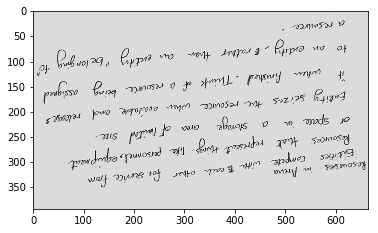

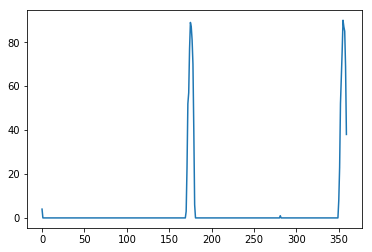

11


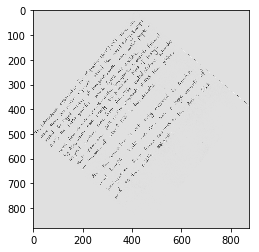

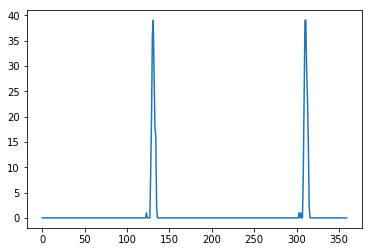

12


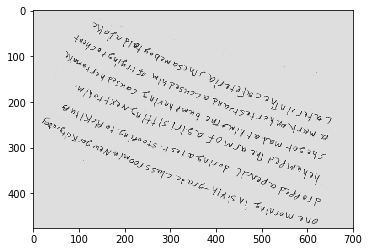

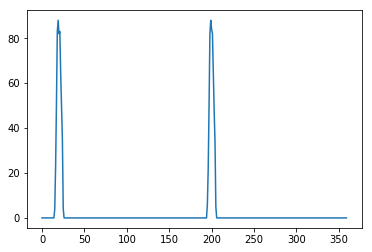

13


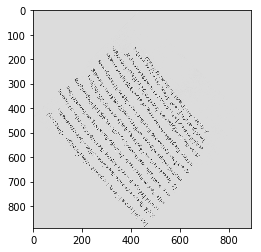

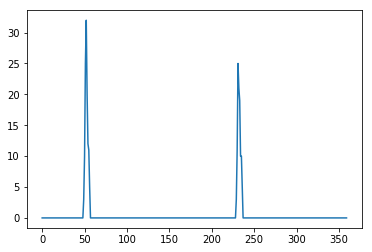

14


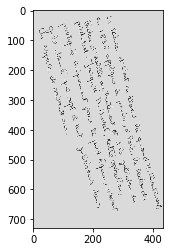

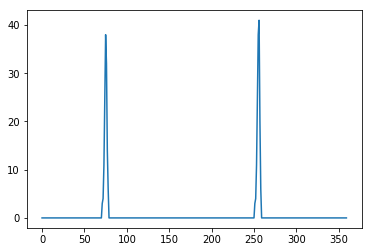

15


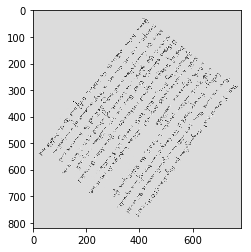

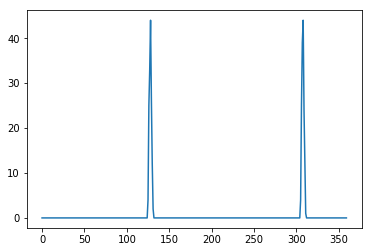

16


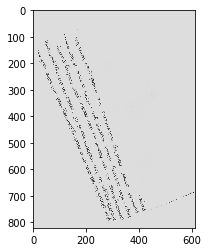

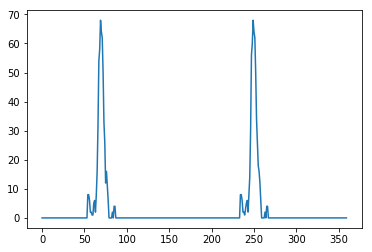

17


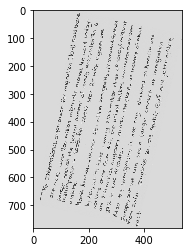

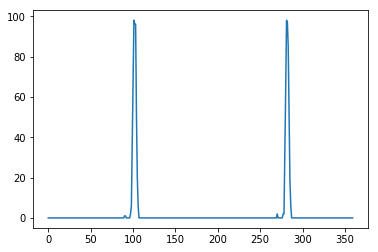

18


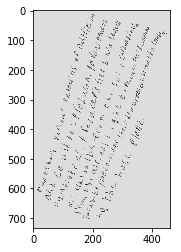

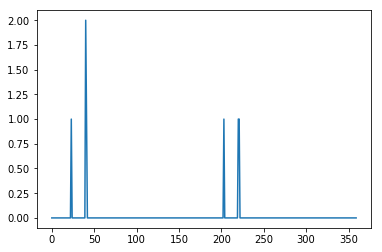

19


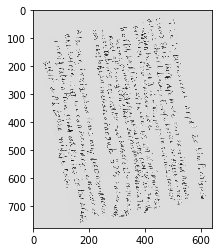

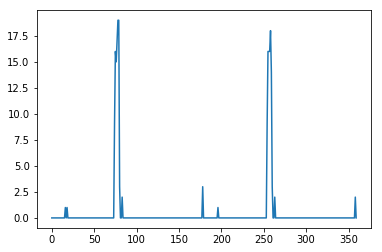

20


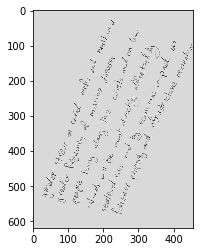

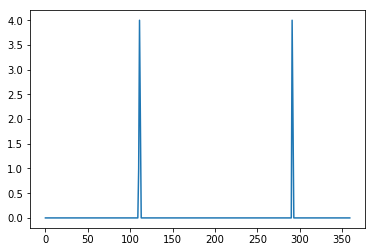

21


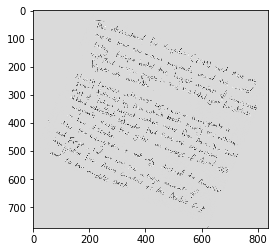

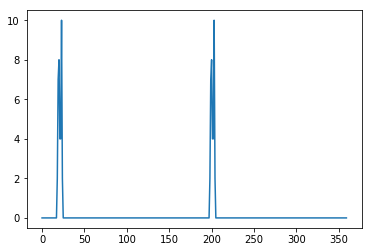

22


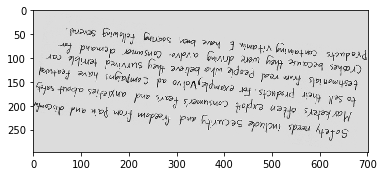

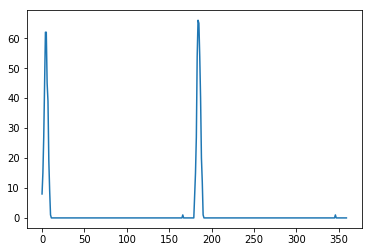

23


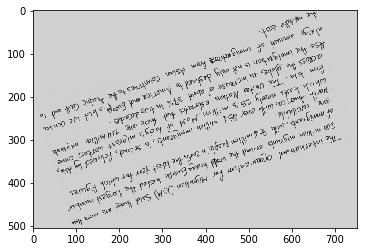

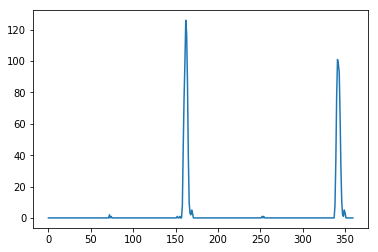

24


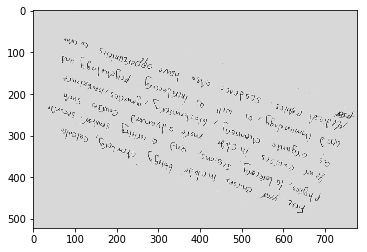

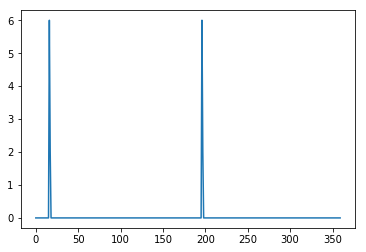

25


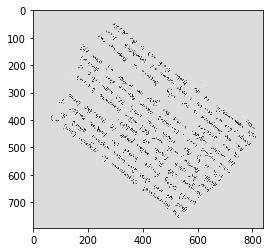

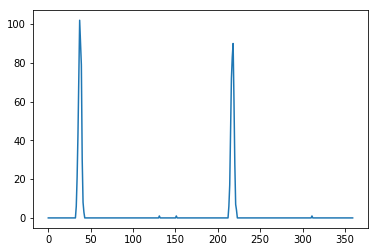

26


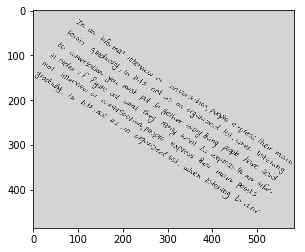

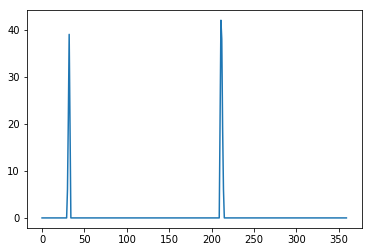

27


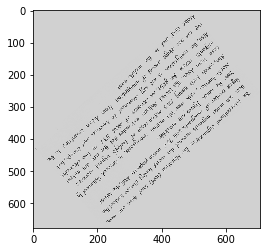

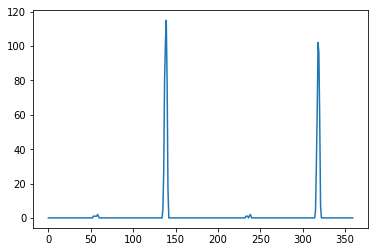

28


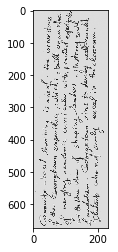

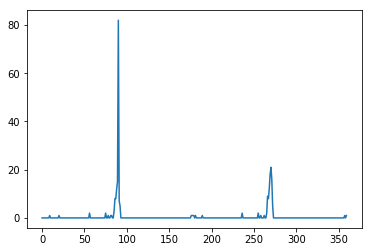

29


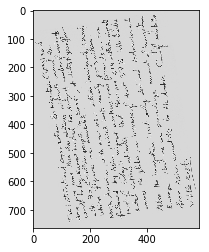

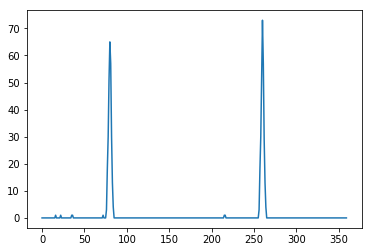

30


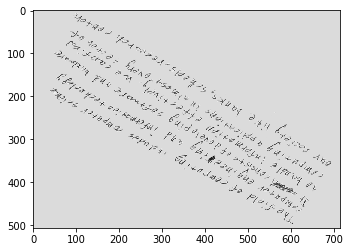

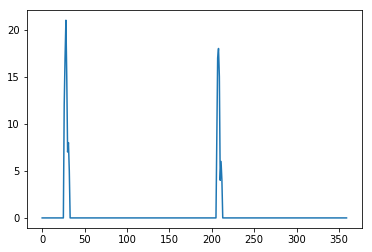

31


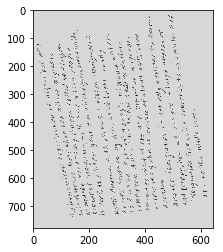

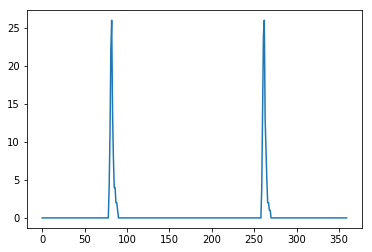

32


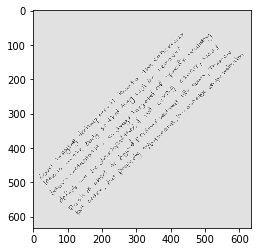

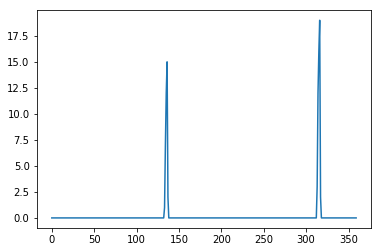

33


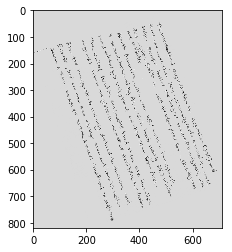

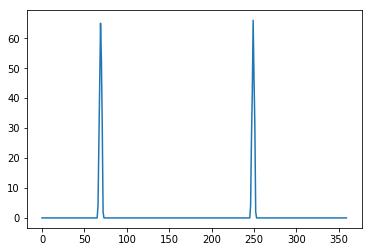

34


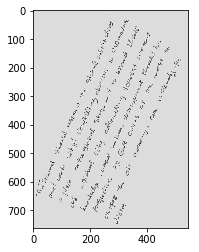

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [275]:
# predict everything, muss jetzt nicht sein, dauert auch ewig xD

y_pred = []

for counter in datanames:
    print(counter)
    datapath = 'data_prepared_english/' + str(int(counter))+'.png' # i know this is ugly
    y_pred.append(pred_simple_2(datapath))

y_pred = np.array(y_pred)

